# 学習用のモジュール

# データセット：
* 日経平均株価
* 日経平均株価偏差値1
* 前日のダウ平均

## 目的変数
* 1日後の予想 
* 3日後の予想 
* 5日後の予想 
* 10日後の予想 
* 20日後の予想 
* 30日後の予想 

# 1.モジュールインポート

In [1]:
# scikitlearnのアルゴリズムのロード
#!pip3 install xgboost

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 
#from xgboost import XGBClassifier


# scikit learnの精度測定ツールの読み込み
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# pandas(pd) とNumpy(np)のモジュール
import numpy as np
import pandas as pd
import sys,os,random
import warnings
import pickle


import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

# 変数定義

In [2]:
pram_traing_rate=0.8  #トレーニングデータとテストデータの比率

# 前処理済みファイルのロード

In [3]:
# 乱数のシード固定
np.random.seed(0)
random.seed(0)
# データフレームの表示件数の設定
pd.set_option('display.max_columns', 100)

# データロード
df = pd.read_pickle('data/stock_preprocessing_20201017.pkl')

# クローズを DROP
#df=df.drop('Close', axis=1)
df=df.dropna(how="any",axis=0)

display(df.head(3))
display(df.tail(3))

# 前後のデータのカット
#df=df.loc[NaN_no:(len(df)-NaN_no),:]


#df_num=df.as_matrix()   #numpyへ変換
df_num = df.to_numpy()


df_len=len(df)

Price,Date,Open,Close,dow_compare,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day+31,day+32,day+33,day+34,day+35,day+36,day+37,day+38,day+39,day+40,day+41,day+42,day+43,day+44,day+45,day+46,...,day+53,day+54,day+55,day+56,day+57,day+58,day+59,day+60,day+61,day+62,day+63,day+64,day+65,day+66,day+67,day+68,day+69,day+70,day+71,day+72,day+73,day+74,day+75,day+76,day+77,day+78,day+79,day+80,day+81,day+82,day+83,day+84,day+85,day+86,day+87,day+88,day+89,day+90,result_1day,result_3day,result_5day,result_10day,result_20day,result_30day,result_1day_open,result_3day_open,result_5day_open,result_10day_open,result_20day_open,result_30day_open
90,2000-05-22,16802.660156,16386.009766,0.987238,-0.929400,-3.238853,-4.469605,-3.114713,-3.413277,-0.950308,-4.560980,-5.598848,-7.435443,-9.006156,-9.162631,-6.544154,-6.835831,-7.283899,-8.316956,-8.846167,-11.800206,-11.757822,-11.555918,-11.977264,-17.397143,-17.861432,-18.970217,-17.939577,-18.212944,-17.507897,-17.104094,-17.940657,-18.221699,-19.014817,-17.341428,-17.517048,-18.853011,-17.660499,-17.120817,-15.886354,-14.932544,-14.921128,-14.325603,-14.265709,-13.099875,-12.007829,-12.120257,-12.209836,-14.843473,-14.857884,...,-16.112866,-14.972833,-15.067043,-14.374285,-14.343201,-13.562872,-14.863538,-15.361132,-14.474476,-13.471134,-14.218837,-14.701118,-15.630361,-15.693355,-15.798512,-15.278255,-15.420820,-14.483097,-13.931072,-13.994290,-13.277082,-12.763348,-12.145798,-11.485003,-11.585378,-10.995604,-11.541159,-11.239146,-12.403426,-11.684030,-11.016953,-9.988223,-10.529776,-7.910948,-7.647503,-9.536711,-11.581280,-11.272844,1,0,0,0,1,1,1,0,0,0,1,1
91,2000-05-23,16345.259766,16318.730469,0.992260,-2.722190,-3.626290,-5.872875,-7.070124,-5.752115,-6.042552,-3.646629,-7.159012,-8.168627,-9.955226,-11.483182,-11.635397,-9.088200,-9.371937,-9.807807,-10.812743,-11.327548,-14.201173,-14.159942,-13.963535,-14.373410,-19.645750,-20.097400,-21.176002,-20.173418,-20.439344,-19.753489,-19.360678,-20.174469,-20.447860,-21.219388,-19.591552,-19.762391,-21.061986,-19.901937,-19.376946,-18.176088,-17.248242,-17.237137,-16.657823,-16.599559,-15.465462,-14.403143,-14.512510,-14.599651,-17.161596,...,-18.670548,-18.396433,-17.287435,-17.379080,-16.705180,-16.674942,-15.915855,-17.181115,-17.665163,-16.802644,-15.826615,-16.553963,-17.023116,-17.927063,-17.988342,-18.090637,-17.584542,-17.723226,-16.811029,-16.274032,-16.335529,-15.637845,-15.138095,-14.537356,-13.894549,-13.992192,-13.418473,-13.949177,-13.655386,-14.787972,-14.088158,-13.439240,-12.438515,-12.965325,-10.417787,-10.161514,-11.999294,-13.988206,1,0,0,0,1,1,1,0,0,0,1,1
92,2000-05-24,16237.879883,16044.440430,0.988913,-0.656948,-3.361255,-4.259415,-6.491242,-7.680625,-6.371275,-6.659804,-4.279621,-7.768929,-8.771912,-10.546773,-12.064691,-12.215906,-9.685444,-9.967316,-10.400323,-11.398657,-11.910080,-14.764827,-14.723867,-14.528750,-14.935932,-20.173636,-20.622319,-21.693835,-20.697837,-20.962016,-20.280667,-19.890437,-20.698881,-20.970476,-21.736936,-20.119793,-20.289510,-21.580568,-20.428140,-19.906597,-18.713628,-17.791878,-17.780846,-17.205338,-17.147457,-16.020810,-14.965470,-15.074119,-15.160687,...,-18.904019,-19.204840,-18.932526,-17.830813,-17.921856,-17.252384,-17.222345,-16.468245,-17.725192,-18.206060,-17.349207,-16.379590,-17.102160,-17.568231,-18.466240,-18.527116,-18.628739,-18.125969,-18.263742,-17.357538,-16.824069,-16.885161,-16.192061,-15.695594,-15.098801,-14.460218,-14.557219,-13.987269,-14.514486,-14.222625,-15.347771,-14.652555,-14.007900,-13.013748,-13.537098,-11.006296,-10.751706,-12.577413,0,0,0,0,1,0,1,0,0,0,0,1


Price,Date,Open,Close,dow_compare,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day+31,day+32,day+33,day+34,day+35,day+36,day+37,day+38,day+39,day+40,day+41,day+42,day+43,day+44,day+45,day+46,...,day+53,day+54,day+55,day+56,day+57,day+58,day+59,day+60,day+61,day+62,day+63,day+64,day+65,day+66,day+67,day+68,day+69,day+70,day+71,day+72,day+73,day+74,day+75,day+76,day+77,day+78,day+79,day+80,day+81,day+82,day+83,day+84,day+85,day+86,day+87,day+88,day+89,day+90,result_1day,result_3day,result_5day,result_10day,result_20day,result_30day,result_1day_open,result_3day_open,result_5day_open,result_10day_open,result_20day_open,result_30day_open
5917,2025-01-07,39584.359375,40083.300781,0.996989,-0.903890,-1.838580,-0.221286,1.061669,0.954161,1.392496,1.627917,2.757080,1.040104,-0.013360,0.083792,-0.100170,-0.666523,0.575718,0.530460,0.640204,0.540494,-0.065817,0.585352,2.156749,3.578020,4.345267,3.278294,2.558758,2.338240,3.768002,3.210942,2.881456,3.093078,3.462582,2.154349,1.730409,0.679629,-0.147371,0.424049,-0.500434,-0.404756,2.343480,3.423037,2.804898,1.032781,1.231287,2.751662,4.837154,4.293473,4.708008,...,-1.155611,-0.132482,0.021626,0.504935,1.443399,0.877773,2.564156,2.925783,3.797337,3.535975,1.192631,1.217364,3.443117,4.313892,3.701728,4.959128,7.103641,8.313679,8.148285,7.325848,9.392511,9.865309,8.789720,10.552863,7.522367,8.342699,4.060076,1.432534,3.116388,3.841585,3.566016,3.987912,3.742357,3.412335,4.076845,5.128415,4.588128,4.544180,0,0,0,0,0,0,0,0,0,0,0,0
5918,2025-01-08,39879.359375,39981.058594,0.993428,0.745244,-0.165382,-1.107038,0.522308,1.814824,1.706516,2.148118,2.385292,3.522871,1.793100,0.731785,0.829660,0.644327,0.073753,1.325253,1.279657,1.390219,1.289766,0.678937,1.334958,2.918065,4.349929,5.122894,4.047969,3.323071,3.100910,4.541326,3.980115,3.648173,3.861373,4.233630,2.915648,2.488549,1.429938,0.596775,1.172453,0.241081,0.337472,3.106189,4.193791,3.571045,1.785721,1.985707,3.517413,5.618446,5.070713,...,1.312744,-0.418979,0.611775,0.767031,1.253942,2.199399,1.629559,3.328509,3.692831,4.570881,4.307571,1.946763,1.971680,4.214020,5.091285,4.474559,5.741330,7.901824,9.120880,8.954254,8.125687,10.207752,10.684074,9.600469,11.376751,8.323671,9.150116,4.835577,2.188454,3.884857,4.615458,4.337835,4.762875,4.515491,4.183009,4.852471,5.911878,5.367564,0,0,0,0,0,0,0,0,0,0,0,0
5919,2025-01-09,39888.910156,39605.089844,1.002188,0.023949,0.769372,-0.141472,-1.083354,0.546383,1.839208,1.730874,2.172581,2.409813,3.547664,1.817478,0.755909,0.853808,0.668431,0.097720,1.349519,1.303912,1.414501,1.314024,0.703048,1.359227,2.942714,4.374920,5.148070,4.072888,3.347816,3.125602,4.566363,4.005017,3.672996,3.886247,4.258593,2.940296,2.513094,1.454230,0.620867,1.196683,0.265087,0.361502,3.130882,4.218744,3.595850,1.810098,2.010132,3.542204,5.643741,...,1.592025,1.337007,-0.395130,0.635870,0.791164,1.278191,2.223875,1.653898,3.353255,3.717664,4.595925,4.332552,1.971178,1.996101,4.238979,5.116453,4.499580,5.766654,7.927666,9.147013,8.980347,8.151582,10.234145,10.710582,9.626717,11.403425,8.349613,9.176257,4.860684,2.212927,3.909736,4.640512,4.362823,4.787965,4.540521,4.207960,4.877582,5.937243,0,0,0,0,0,0,0,0,0,0,0,0


## データの分割


In [4]:
loc_result=df.columns.get_loc('result_1day')
loc_resultdata=df.columns.get_loc('result_1day')
loc_open  =df.columns.get_loc('Open')

In [5]:
from sklearn.model_selection import train_test_split

# データ分割の比率を指定
pram_traing_rate = 0.8  # トレーニングデータの割合

# データ分割
train, test = train_test_split(df, train_size=pram_traing_rate, shuffle=False)

# 説明変数（特徴量）の抽出
trainX, testX = train.iloc[:, loc_open:loc_result], test.iloc[:, loc_open:loc_result]

# 正解ラベルの抽出
trainY, testY = train.iloc[:, loc_resultdata], test.iloc[:, loc_resultdata]

# Numpy形式に変換
trainX, testX = trainX.to_numpy(), testX.to_numpy()
trainY, testY = trainY.to_numpy(), testY.to_numpy()

# データサンプル数の確認
print("訓練  データ{} : {} 〜 {}".format(train.shape, train.head(1)['Date'].values[0], train.tail(1)['Date'].values[0]))
print("テストデータ{}  : {} 〜 {}".format(test.shape, test.head(1)['Date'].values[0], test.tail(1)['Date'].values[0]))


訓練  データ(4664, 106) : 2000-05-22T00:00:00.000000000 〜 2020-01-29T00:00:00.000000000
テストデータ(1166, 106)  : 2020-01-30T00:00:00.000000000 〜 2025-01-09T00:00:00.000000000


# sckit-learnの準備


In [6]:
# Initializing Classifiers
classifiers = {
    "Random Forest"      : RandomForestClassifier(random_state=1, n_estimators=100),
    "Decision Tree"      : DecisionTreeClassifier(),
    "Neural Net"         : MLPClassifier(),
    "Naive Bayes"        : GaussianNB(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
   # "XGBClassifier"     :XGBClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM"                : SVC(kernel="linear"),

}

分類器: Random Forest , 精度: 48.28%
分類器: Decision Tree , 精度: 46.05%
分類器: Neural Net , 精度: 45.97%
分類器: Naive Bayes , 精度: 49.49%
分類器: AdaBoostClassifier , 精度: 45.97%
分類器: Logistic Regression , 精度: 53.26%
0.label_down 630
1.label_up   536
Confusion Matrix:
[[582  48]
 [497  39]]

Classification Report:
              precision    recall  f1-score   support

          up       0.54      0.92      0.68       630
        down       0.45      0.07      0.13       536

    accuracy                           0.53      1166
   macro avg       0.49      0.50      0.40      1166
weighted avg       0.50      0.53      0.43      1166

分類器: SVM , 精度: 54.12%
0.label_down 630
1.label_up   536
Confusion Matrix:
[[596  34]
 [501  35]]

Classification Report:
              precision    recall  f1-score   support

          up       0.54      0.95      0.69       630
        down       0.51      0.07      0.12       536

    accuracy                           0.54      1166
   macro avg       0.53      0.51    

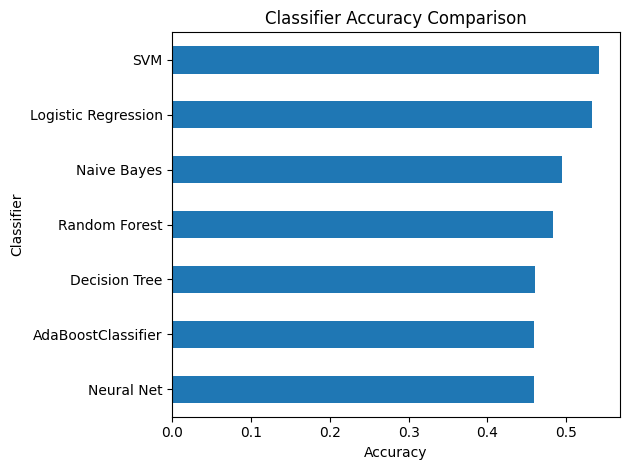

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 分類器の定義
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#classifiers = {
#    'RandomForest': RandomForestClassifier(),
#    'SVM': SVC()
#}

# 結果格納用データフレーム
df_acc = pd.DataFrame(columns=['name', 'accuracy'])

for i in classifiers:
    # 該当分類器にて学習
    classifier = classifiers[i]
    classifier.fit(trainX, trainY.ravel())

    # 分類器の正答率を求める
    pre = classifier.predict(testX)
    ac_score = accuracy_score(testY, pre)
    print('分類器: {:} , 精度: {:.2%}'.format(i, ac_score))

    # 結果をデータフレームに追加
    new_row = pd.DataFrame({'name': [i], 'accuracy': [ac_score]})
    df_acc = pd.concat([df_acc, new_row], ignore_index=True)

    # 精度が 50% を超える場合の詳細レポート
    if ac_score > 0.5:
        print("0.label_down", test[test.iloc[:, loc_resultdata] == 0].shape[0])
        print("1.label_up  ", test[test.iloc[:, loc_resultdata] == 1].shape[0])

        predict_y = classifier.predict(testX)
        print("Confusion Matrix:")
        print(confusion_matrix(testY, predict_y))
        print()
        print("Classification Report:")
        print(classification_report(testY, predict_y, target_names=['up', 'down']))

# 分類器の精度順にソート
df_acc = df_acc.sort_values(by='accuracy', ascending=True)

# 棒グラフの作成
df_acc.plot.barh(x='name', y='accuracy', legend=False)
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Classifier Accuracy Comparison')
plt.tight_layout()
plt.show()


# モデルの保存

In [11]:
df_acc[df_acc['accuracy']==df_acc['accuracy'].max()]['name'].values[0]

'SVM'

In [12]:
classifier=classifiers[
#df_acc[df_acc['accuracy']==df_acc['accuracy'].max()].index[0]
df_acc[df_acc['accuracy']==df_acc['accuracy'].max()]['name'].values[0]
]
classifier.fit(trainX ,trainY)

# モデルを保存する
filename = 'model/sk-learn_model_20201107.sav'
pickle.dump(classifier, open(filename, 'wb'))

# ラベルデータ
#f = open('./model/predict_columns.txt', 'w')
#for x in predict_columns:
#    f.write(str(x) + "\n")
#f.close()

# テストデータ
test.to_pickle("data/df_test.pkl")

# confusion_matrix

In [13]:
# SVC などの場合、probability=True を指定して学習器を再定義
if i == 'SVM' and not getattr(classifiers[i], "probability", False):
    classifiers[i] = SVC(probability=True)
    classifiers[i].fit(trainX, trainY.ravel())

# 買い（特定クラス）の確率を予測し、データフレームに追加
if hasattr(classifier, "predict_proba"):
    test["predict_proba"] = classifier.predict_proba(testX)[:, 1]
else:
    print(f"分類器 {i} は predict_proba をサポートしていません。")


分類器 SVM は predict_proba をサポートしていません。


In [14]:
plt.plot(
test["predict_proba"]
)


KeyError: 'predict_proba'

In [178]:
l=0
for i,row in test.iterrows():
    # 買いになったとき
    #print(i)
    if row['predict_proba']>.5:
        if row['result_20day']==1:
            test.at[i, '正誤'] ="○"
        else:
            test.at[i, '正誤'] ="×"
            
    # 売りになったとき
    else:
        if row['result_20day']==0:
            test.at[i, '正誤'] ="○"
        else:
            test.at[i, '正誤'] ="×"


In [ ]:
df_tmp=test[test['predict_proba']>.6]


df_tmp['正誤'].value_counts()

KeyError: 'predict_proba'

In [26]:
dt_tmp=test[test['predict_proba']>.6]

KeyError: 'predict_proba'

In [27]:
test.shape

(1166, 106)

In [ ]:
dt_tmp

NameError: name 'dt_tmp' is not defined